In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [57]:
df = pd.read_csv('final-human.csv')

In [58]:
len(df)

320

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_steps(df, title, filename):
    # Filter out 'None of the above'
    filtered_df = df[df['answer_task1'] != 'None of the above']

    # Extract step numbers and compute the average
    filtered_df['step_number'] = filtered_df['answer_task1'].str.extract(r'(\d+)').astype(float)
    avg_steps = filtered_df['step_number'].mean()

    # Calculate percentages for each category
    value_counts = filtered_df['answer_task1'].value_counts()
    sorted_order = value_counts.index

    custom_palette = sns.color_palette("viridis_r", len(sorted_order))
    plt.figure(figsize=(5.5, 4))  # Adjust the width and height of the plot

    # Create a bar plot where heights represent percentages
    ax = sns.barplot(
        x=sorted_order, 
        y=value_counts[sorted_order], 
        palette=custom_palette
    )

    # Add percentage labels on the bars
    for p, percentage in zip(ax.patches, value_counts[sorted_order]):
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height + 0.5, f'{percentage:.1f}', 
                ha="center", fontsize=9)

    max_height = value_counts.max()
    plt.ylim(0, max_height + max_height * 0.15)  # Adjust padding above the highest bar

    # Customize the plot
    plt.title(title)
    plt.xlabel("Label flipping step", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(True, linestyle='--', axis='y')
    plt.xticks(rotation=45)  # Rotate x-axis labels if they overlap
    plt.tight_layout()
    plt.savefig(f"{filename}.png")
    plt.show()

In [163]:
def plot_correctness(df, title, filename):
    value_counts = df['answer_task3'].value_counts(normalize=True) * 100
    sorted_order = value_counts.index

    custom_palette = sns.color_palette("flare", len(sorted_order))
    plt.figure(figsize=(4.5, 3.5))  # Adjust width and height

    ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette=custom_palette)

    # Add percentage labels
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10, color='black')

    # Customize plot
    plt.title(title)
    plt.xlabel("Visual correctness", fontsize=12)
    plt.ylabel("Percentage", fontsize=12)
    plt.grid(True, linestyle='--')
    plt.xticks(rotation=0)
    plt.ylim(0, max(value_counts.values) + 7)  # Adds extra space above bars
    plt.tight_layout()
    plt.savefig(f"{filename}.png")
    plt.show()

In [164]:
import re

def extract_step_number(step_string):
    """Extracts the numeric part from a step string and converts it to an integer."""
    match = re.search(r'\d+', step_string)
    return int(match.group()) if match else None

# Example usage:
steps = ["step 1", "step 5", "step 10"]
numbers = [extract_step_number(s) for s in steps]
print(numbers)  # Output: [1, 5, 10]

[1, 5, 10]


In [165]:
len(df['annotator'].value_counts())

31

In [166]:
densenet = df[df['image'].str.contains('classifier', na=False)]
haiku = df[df['image'].str.contains('claude-haiku', na=False)]
sonnet = df[df['image'].str.contains('claude-sonnet', na=False)]

In [167]:
len(densenet), len(haiku), len(sonnet)

(135, 79, 106)

### DenseNet

In [168]:
densenet_global_local = densenet[densenet['image'].str.contains('-global-local-', na=False)]

In [169]:
densenet_rest = densenet.merge(densenet_global_local, how='left', indicator=True).query('_merge == "left_only"').drop(columns=['_merge'])

In [170]:
quality_densenet_global_local =  densenet_global_local['answer_task3']
quality_densenet_global_local.value_counts(normalize=True)*100

Yes    56.666667
No     43.333333
Name: answer_task3, dtype: float64

/tmp/ipykernel_249016/2306609356.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette=custom_palette)


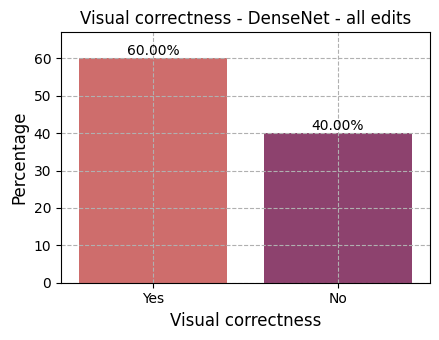

In [171]:
filename = 'densenet-correctness-all'
plot_correctness(densenet, "Visual correctness - DenseNet - all edits", filename)

/tmp/ipykernel_249016/3057539992.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['step_number'] = filtered_df['answer_task1'].str.extract(r'(\d+)').astype(float)
/tmp/ipykernel_249016/3057539992.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


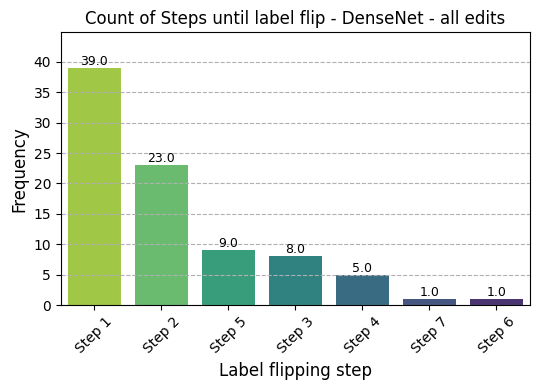

In [172]:
filename = 'densenet-steps-all'
plot_steps(densenet, "Count of Steps until label flip - DenseNet - all edits", filename)

/tmp/ipykernel_249016/2306609356.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette=custom_palette)


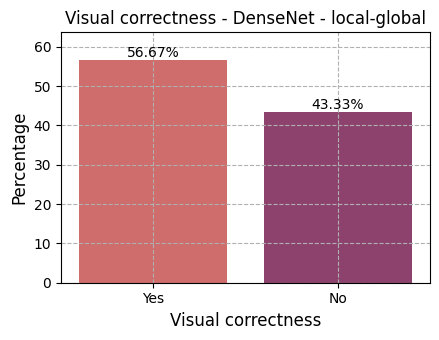

In [173]:
filename = 'densenet-correctness-local_global'
plot_correctness(densenet_global_local, "Visual correctness - DenseNet - local-global", filename)

In [174]:
densenet_global = densenet_rest[densenet_rest['image'].str.contains('-global-', na=False)]
densenet_local = densenet_rest[densenet_rest['image'].str.contains('-claude-', na=False)]

/tmp/ipykernel_249016/2306609356.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette=custom_palette)


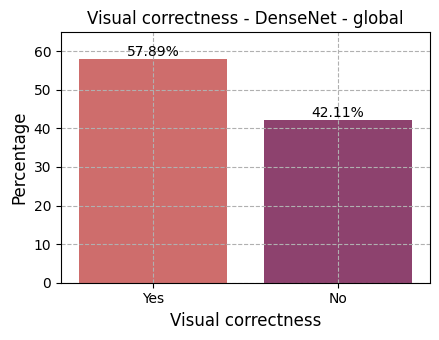

In [175]:
filename = 'densenet-correctness-global'
plot_correctness(densenet_global, "Visual correctness - DenseNet - global", filename)

/tmp/ipykernel_249016/2306609356.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette=custom_palette)


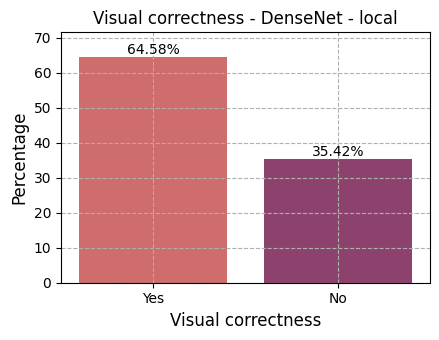

In [176]:
filename = 'densenet-correctness-local'
plot_correctness(densenet_local, "Visual correctness - DenseNet - local", filename)

In [177]:
np.mean(densenet_global_local['answer_task1'].apply(extract_step_number).dropna().astype(int).values)

2.45

In [178]:
np.mean(densenet_local['answer_task1'].apply(extract_step_number).dropna().astype(int).values)

2.0384615384615383

In [179]:
np.mean(densenet_global['answer_task1'].apply(extract_step_number).dropna().astype(int).values)

2.125

/tmp/ipykernel_249016/3057539992.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['step_number'] = filtered_df['answer_task1'].str.extract(r'(\d+)').astype(float)
/tmp/ipykernel_249016/3057539992.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


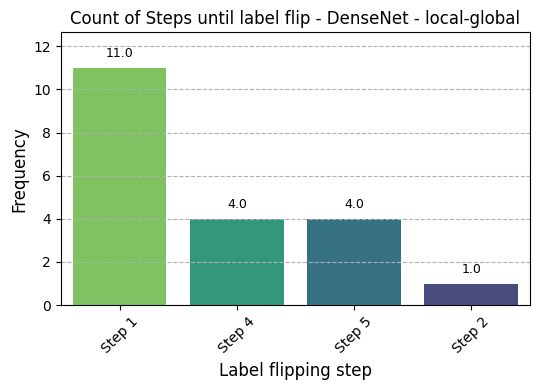

In [180]:
filename = 'densenet-steps-local_global'
plot_steps(densenet_global_local, "Count of Steps until label flip - DenseNet - local-global", filename)

/tmp/ipykernel_249016/3057539992.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['step_number'] = filtered_df['answer_task1'].str.extract(r'(\d+)').astype(float)
/tmp/ipykernel_249016/3057539992.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


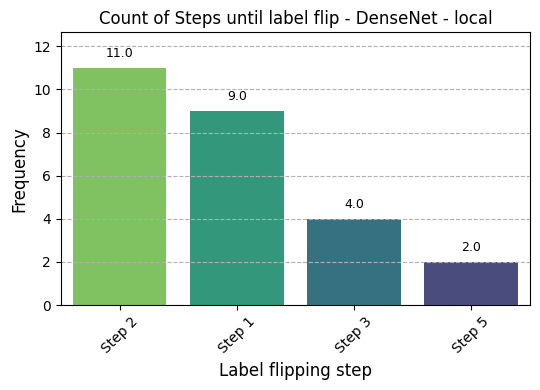

In [181]:
filename = 'densenet-steps-local'
plot_steps(densenet_local, "Count of Steps until label flip - DenseNet - local", filename)

/tmp/ipykernel_249016/3057539992.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['step_number'] = filtered_df['answer_task1'].str.extract(r'(\d+)').astype(float)
/tmp/ipykernel_249016/3057539992.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


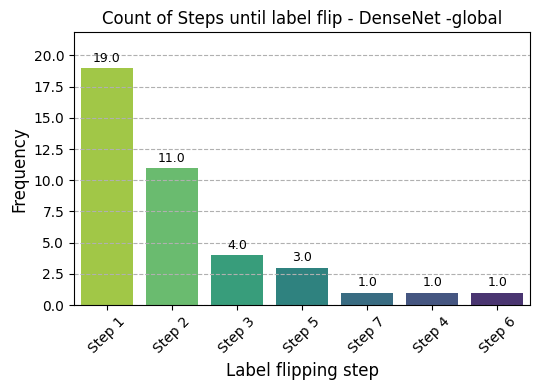

In [182]:
filename = 'densenet-steps-global'
plot_steps(densenet_global, "Count of Steps until label flip - DenseNet -global", filename)

## Haiku

/tmp/ipykernel_249016/2306609356.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette=custom_palette)


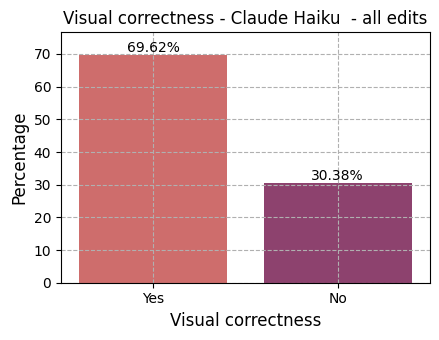

In [183]:
filename = 'haiku-correctness-all'
plot_correctness(haiku, "Visual correctness - Claude Haiku  - all edits", filename)

/tmp/ipykernel_249016/3057539992.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['step_number'] = filtered_df['answer_task1'].str.extract(r'(\d+)').astype(float)
/tmp/ipykernel_249016/3057539992.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


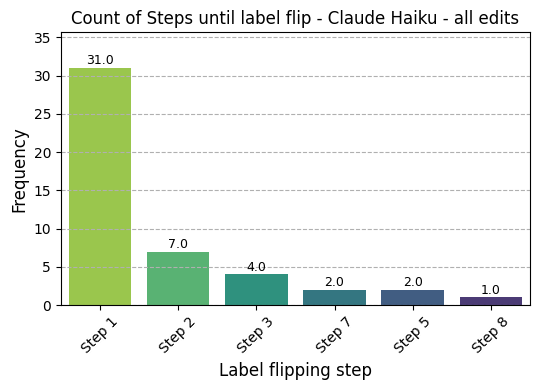

In [184]:
filename = 'haiku-steps-all'
plot_steps(haiku, "Count of Steps until label flip - Claude Haiku - all edits", filename)

In [185]:
haiku_global_local = haiku[haiku['image'].str.contains('-local-', na=False)]
haiku_rest = haiku.merge(haiku_global_local, how='left', indicator=True).query('_merge == "left_only"').drop(columns=['_merge'])
haiku_global = haiku_rest[haiku_rest['image'].str.contains('-global-', na=False)]
haiku_local = haiku_rest[haiku_rest['image'].str.contains('-claude-', na=False)]

In [186]:
haiku_global

,image,id,annotator,updated_at,answer_task1,answer_task2,annotation_id,answer_task3,created_at,lead_time
58,/data/upload/35/1d8d0528-bdd100k-claude-haiku-...,4279,136,2025-01-29T11:42:12.244549Z,None of the above,Yes,4907,No,2025-01-29T11:42:12.244511Z,27.050
59,/data/upload/35/b34727ca-bdd100k-claude-haiku-...,4281,135,2025-01-29T11:43:08.288516Z,Step 1,No,4918,No,2025-01-29T11:43:08.288478Z,27.915
60,/data/upload/35/c061b043-bdd100k-claude-haiku-...,4282,137,2025-01-29T11:44:01.042618Z,Step 1,No,4920,Yes,2025-01-29T11:44:01.042582Z,15.919
61,/data/upload/35/269d1d09-bdd100k-claude-haiku-...,4283,135,2025-01-29T11:42:36.131767Z,Step 2,No,4913,Yes,2025-01-29T11:42:36.131728Z,15.839
62,/data/upload/35/cb1841b0-bdd100k-claude-haiku-...,4284,138,2025-01-29T11:48:07.125717Z,Step 1,No,4933,Yes,2025-01-29T11:48:07.125680Z,5.723
63,/data/upload/35/e472a242-bdd100k-claude-haiku-...,4288,138,2025-01-29T11:46:10.753298Z,Step 1,No,4922,Yes,2025-01-29T11:46:10.753260Z,19.763
64,/data/upload/35/95a29cbd-bdd100k-claude-haiku-...,4289,136,2025-01-29T11:41:42.898066Z,Step 3,No,4905,No,2025-01-29T11:41:42.898030Z,12.922
65,/data/upload/35/33fd9713-bdd100k-claude-haiku-...,4290,134,2025-01-29T11:40:30.520733Z,Step 5,No,4899,Yes,2025-01-29T11:40:30.520682Z,11.701
66,/data/upload/35/1a8720fc-bdd100k-claude-haiku-...,4291,134,2025-01-29T11:40:00.197983Z,Step 1,No,4893,Yes,2025-01-29T11:40:00.197917Z,7.561
67,/data/upload/35/4b28681f-bdd100k-claude-haiku-...,4293,134,2025-01-29T11:40:18.479858Z,Step 1,No,4898,Yes,2025-01-29T11:40:18.479823Z,11.613


/tmp/ipykernel_249016/2306609356.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette=custom_palette)


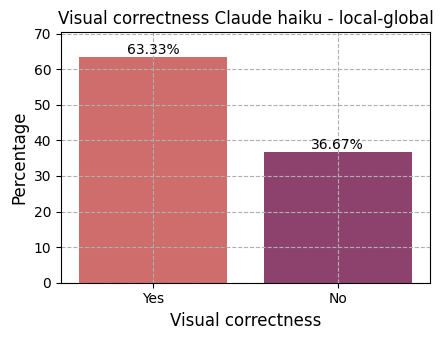

In [187]:
filename = 'haiku-correctness-local_global'
plot_correctness(haiku_global_local, "Visual correctness Claude haiku - local-global", filename)

/tmp/ipykernel_249016/2306609356.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette=custom_palette)


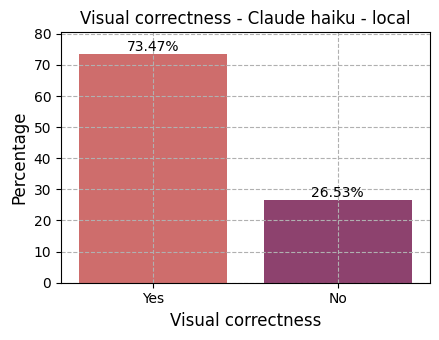

In [188]:
filename = 'haiku-correctness-local'
plot_correctness(haiku_local, "Visual correctness - Claude haiku - local", filename)

/tmp/ipykernel_249016/2306609356.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette=custom_palette)


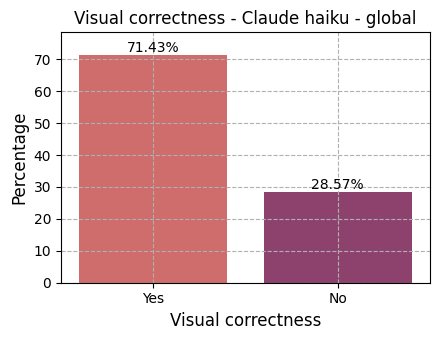

In [189]:
filename = 'haiku-correctness-global'
plot_correctness(haiku_global, "Visual correctness - Claude haiku - global", filename)

/tmp/ipykernel_249016/3057539992.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['step_number'] = filtered_df['answer_task1'].str.extract(r'(\d+)').astype(float)
/tmp/ipykernel_249016/3057539992.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


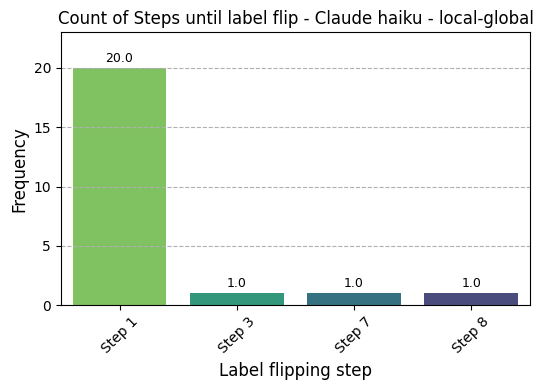

In [190]:
filename = 'haiku-steps-local_global'
plot_steps(haiku_global_local, "Count of Steps until label flip - Claude haiku - local-global", filename)

/tmp/ipykernel_249016/3057539992.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['step_number'] = filtered_df['answer_task1'].str.extract(r'(\d+)').astype(float)
/tmp/ipykernel_249016/3057539992.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


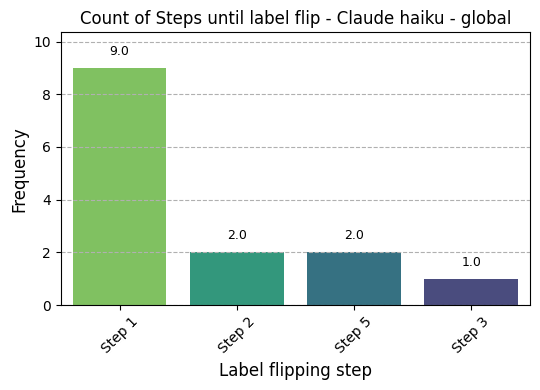

In [191]:
filename = 'haiku-steps-global'
plot_steps(haiku_global, "Count of Steps until label flip - Claude haiku - global", filename)

/tmp/ipykernel_249016/3057539992.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['step_number'] = filtered_df['answer_task1'].str.extract(r'(\d+)').astype(float)
/tmp/ipykernel_249016/3057539992.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


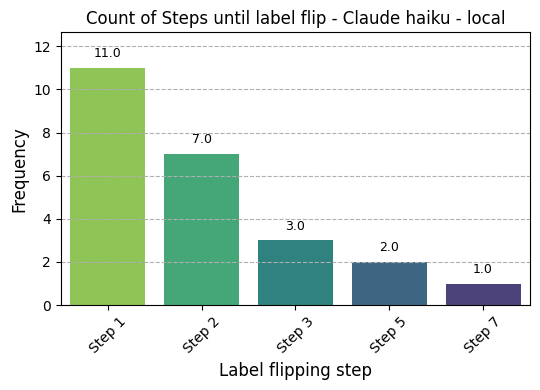

In [192]:
filename = 'haiku-steps-local'
plot_steps(haiku_local, "Count of Steps until label flip - Claude haiku - local", filename)

In [193]:
np.mean(haiku_global_local['answer_task1'].apply(extract_step_number).dropna().astype(int).values)

1.6521739130434783

In [194]:
np.mean(haiku_local['answer_task1'].apply(extract_step_number).dropna().astype(int).values)

2.125

In [195]:
np.mean(haiku_global['answer_task1'].apply(extract_step_number).dropna().astype(int).values)

1.8571428571428572

## SOnnet

/tmp/ipykernel_249016/2306609356.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette=custom_palette)


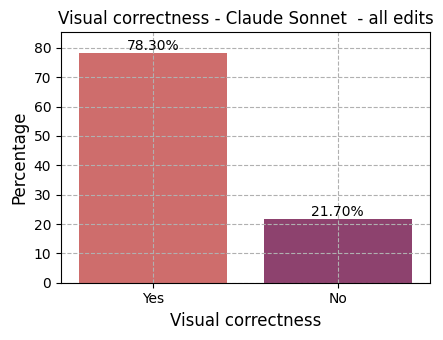

In [219]:
filename = 'sonnet-correctness-all'
plot_correctness(sonnet, "Visual correctness - Claude Sonnet  - all edits", filename)

/tmp/ipykernel_249016/3057539992.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['step_number'] = filtered_df['answer_task1'].str.extract(r'(\d+)').astype(float)
/tmp/ipykernel_249016/3057539992.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


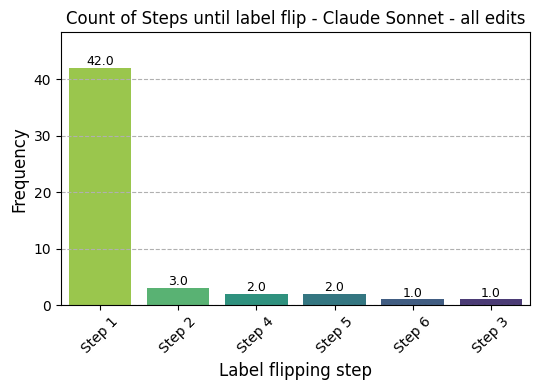

In [197]:
filename = 'sonnet-steps-all'
plot_steps(sonnet, "Count of Steps until label flip - Claude Sonnet - all edits", filename)

In [198]:
sonnet_global_local = sonnet[sonnet['image'].str.contains('-local-', na=False)]
sonnet_rest = sonnet.merge(sonnet_global_local, how='left', indicator=True).query('_merge == "left_only"').drop(columns=['_merge'])
sonnet_global = sonnet_rest[sonnet_rest['image'].str.contains('-global-', na=False)]
sonnet_local = sonnet_rest[sonnet_rest['image'].str.contains('-claude-', na=False)]

/tmp/ipykernel_249016/2306609356.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette=custom_palette)


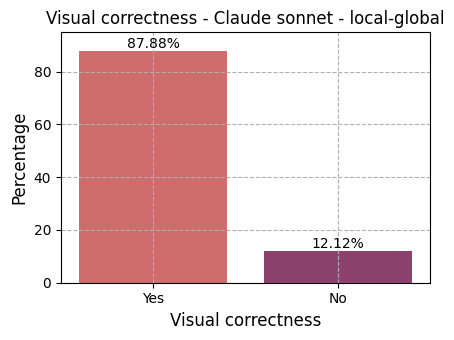

In [199]:
filename = 'sonnet-correctness-local_global'
plot_correctness(sonnet_global_local, "Visual correctness - Claude sonnet - local-global", filename)

/tmp/ipykernel_249016/2306609356.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette=custom_palette)


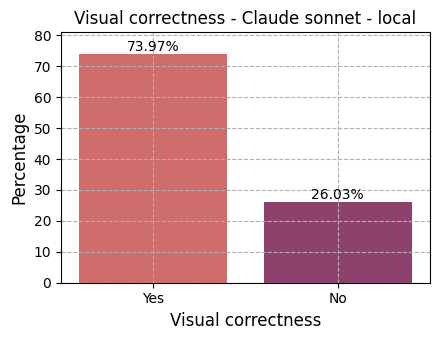

In [200]:
filename = 'sonnet-correctness-local'
plot_correctness(sonnet_local, "Visual correctness - Claude sonnet - local", filename)

/tmp/ipykernel_249016/2306609356.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette=custom_palette)


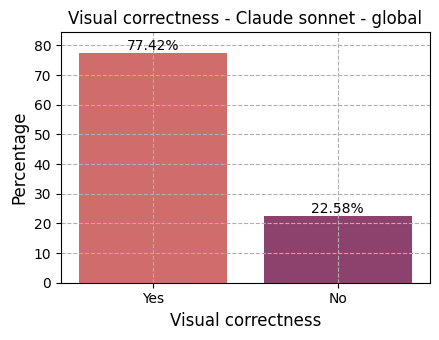

In [201]:
filename = 'sonnet-correctness-global'
plot_correctness(sonnet_global, "Visual correctness - Claude sonnet - global", filename)

/tmp/ipykernel_249016/3057539992.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['step_number'] = filtered_df['answer_task1'].str.extract(r'(\d+)').astype(float)
/tmp/ipykernel_249016/3057539992.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


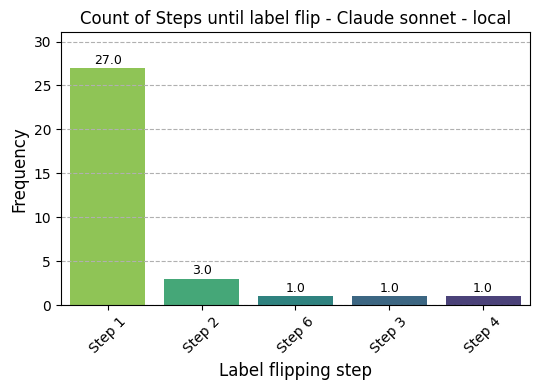

In [202]:
filename = 'sonnet-steps-local'
plot_steps(sonnet_local, "Count of Steps until label flip - Claude sonnet - local", filename)

/tmp/ipykernel_249016/3057539992.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['step_number'] = filtered_df['answer_task1'].str.extract(r'(\d+)').astype(float)
/tmp/ipykernel_249016/3057539992.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


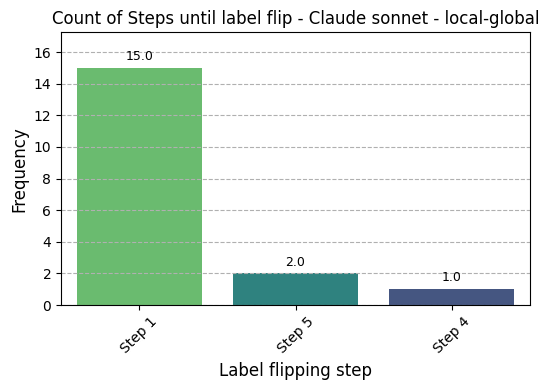

In [203]:
filename = 'sonnet-steps-local_global'
plot_steps(sonnet_global_local, "Count of Steps until label flip - Claude sonnet - local-global", filename)

/tmp/ipykernel_249016/3057539992.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['step_number'] = filtered_df['answer_task1'].str.extract(r'(\d+)').astype(float)
/tmp/ipykernel_249016/3057539992.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


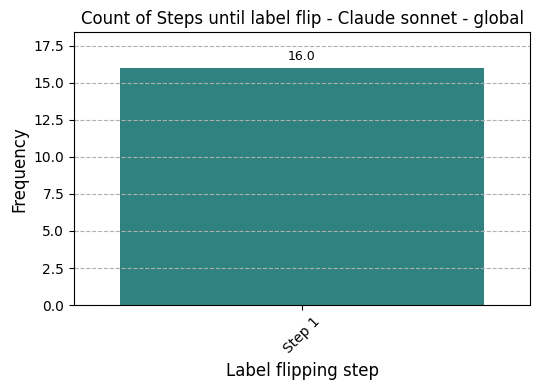

In [204]:
filename = 'sonnet-steps-global'
plot_steps(sonnet_global, "Count of Steps until label flip - Claude sonnet - global", filename)

In [158]:
np.mean(sonnet_global_local['answer_task1'].apply(extract_step_number).dropna().astype(int).values)

1.6111111111111112

In [159]:
np.mean(sonnet_local['answer_task1'].apply(extract_step_number).dropna().astype(int).values)

1.393939393939394

In [160]:
np.mean(sonnet_global['answer_task1'].apply(extract_step_number).dropna().astype(int).values)

1.0

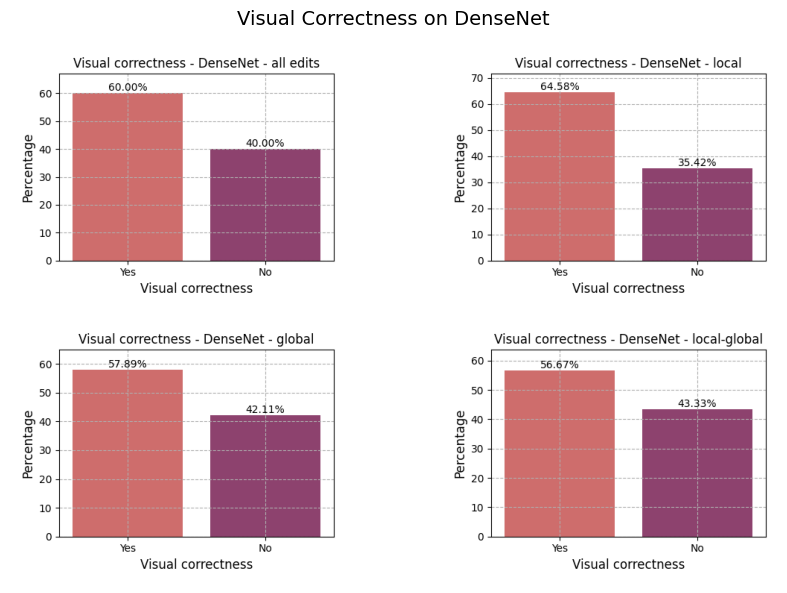

In [211]:
import matplotlib.pyplot as plt
import cv2
import os

# Folder containing images
image_folder = "."  # Change to your actual folder path

# Get all images in the folder that contain 'densenet' and 'correctness' in the filename
filtered_images = [f for f in os.listdir(image_folder) 
                   if "densenet" in f.lower() and "correctness" in f.lower() and f.endswith(('.png', '.jpg', '.jpeg'))]

# Define expected filename patterns for sorting
filename_patterns = ["-all", "-local.", "-global.", "local_global."]

# Dictionary to store selected images
selected_images = {}

# Assign images based on filename patterns
for f in filtered_images:
    lower_f = f.lower()
    for pattern in filename_patterns:
        if pattern in lower_f:
            selected_images[pattern] = os.path.join(image_folder, f)

# Ensure we found exactly 4 required images
if len(selected_images) != 4:
    raise ValueError(f"Expected 4 images matching patterns {filename_patterns}, but found {len(selected_images)}. Check filenames.")

# Sort images in the required order
sorted_images = [selected_images[pattern] for pattern in filename_patterns]

# Create a 2x2 grid for displaying images
fig, axs = plt.subplots(2, 2, figsize=(9, 6))

# Loop through sorted images and display them in the correct order
for ax, img_path in zip(axs.flat, sorted_images):
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for Matplotlib

    ax.imshow(image)
    ax.axis('off')  # Hide axes

# Add title to the figure
fig.suptitle("Visual Correctness on DenseNet", fontsize=14)

# Reduce vertical spacing between rows
plt.subplots_adjust(hspace=0.0)

# Save and display the figure
plt.tight_layout()
plt.savefig("correctness-densenet.png")
plt.show()


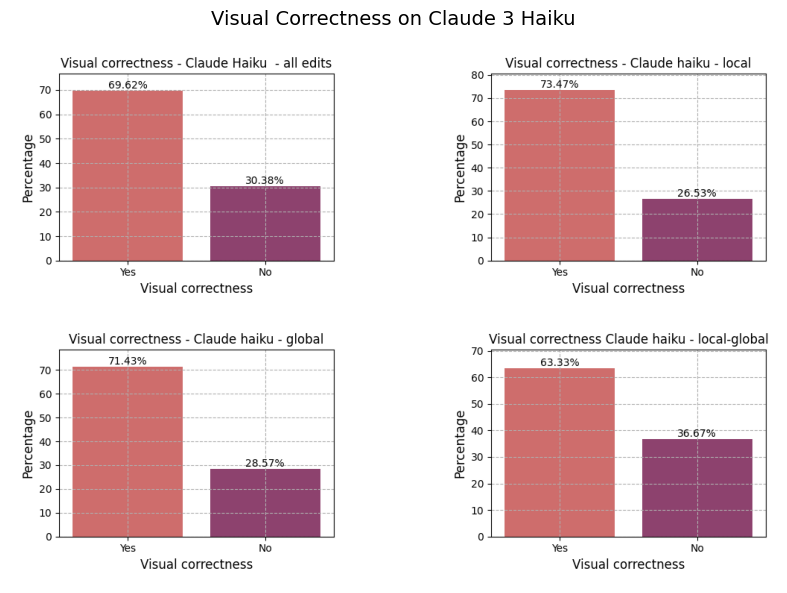

In [212]:
# Folder containing images
image_folder = "."  # Change to your actual folder path

# Get all images in the folder that contain 'densenet' and 'correctness' in the filename
filtered_images = [f for f in os.listdir(image_folder) 
                   if "haiku" in f.lower() and "correctness" in f.lower() and f.endswith(('.png', '.jpg', '.jpeg'))]

# Define expected filename patterns for sorting
filename_patterns = ["-all", "-local.", "-global.", "local_global."]

# Dictionary to store selected images
selected_images = {}

# Assign images based on filename patterns
for f in filtered_images:
    lower_f = f.lower()
    for pattern in filename_patterns:
        if pattern in lower_f:
            selected_images[pattern] = os.path.join(image_folder, f)

# Ensure we found exactly 4 required images
if len(selected_images) != 4:
    raise ValueError(f"Expected 4 images matching patterns {filename_patterns}, but found {len(selected_images)}. Check filenames.")

# Sort images in the required order
sorted_images = [selected_images[pattern] for pattern in filename_patterns]

# Create a 2x2 grid for displaying images
fig, axs = plt.subplots(2, 2, figsize=(9, 6))

# Loop through sorted images and display them in the correct order
for ax, img_path in zip(axs.flat, sorted_images):
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for Matplotlib

    ax.imshow(image)
    ax.axis('off')  # Hide axes    
fig.suptitle("Visual Correctness on Claude 3 Haiku", fontsize=14)

plt.subplots_adjust(hspace=0.0)  # Decrease value to bring rows closer

plt.tight_layout()
plt.savefig("correctness-haiku.png")
plt.show()

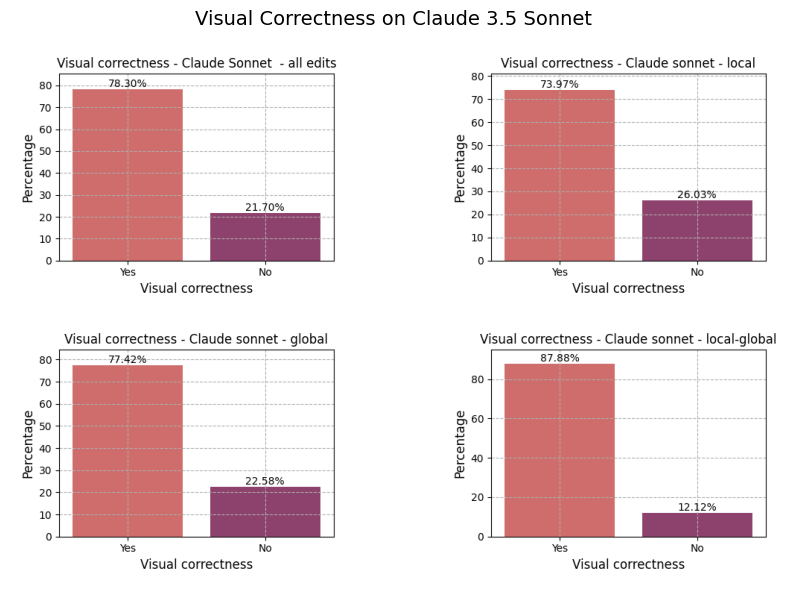

In [220]:
# Folder containing images
image_folder = "."  # Change to your actual folder path

# Get all images in the folder that contain 'densenet' and 'correctness' in the filename
filtered_images = [f for f in os.listdir(image_folder) 
                   if "sonnet" in f.lower() and "correctness" in f.lower() and f.endswith(('.png', '.jpg', '.jpeg'))]

# Define expected filename patterns for sorting
filename_patterns = ["-all", "-local.", "-global.", "local_global."]

# Dictionary to store selected images
selected_images = {}

# Assign images based on filename patterns
for f in filtered_images:
    lower_f = f.lower()
    for pattern in filename_patterns:
        if pattern in lower_f:
            selected_images[pattern] = os.path.join(image_folder, f)

# Ensure we found exactly 4 required images
if len(selected_images) != 4:
    raise ValueError(f"Expected 4 images matching patterns {filename_patterns}, but found {len(selected_images)}. Check filenames.")

# Sort images in the required order
sorted_images = [selected_images[pattern] for pattern in filename_patterns]

# Create a 2x2 grid for displaying images
fig, axs = plt.subplots(2, 2, figsize=(9, 6))

# Loop through sorted images and display them in the correct order
for ax, img_path in zip(axs.flat, sorted_images):
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for Matplotlib

    ax.imshow(image)
    ax.axis('off')  # Hide axes
    
fig.suptitle("Visual Correctness on Claude 3.5 Sonnet", fontsize=14)

plt.subplots_adjust(hspace=0.0)  # Decrease value to bring rows closer

plt.tight_layout()
plt.savefig("correctness-sonnet.png")
plt.show()

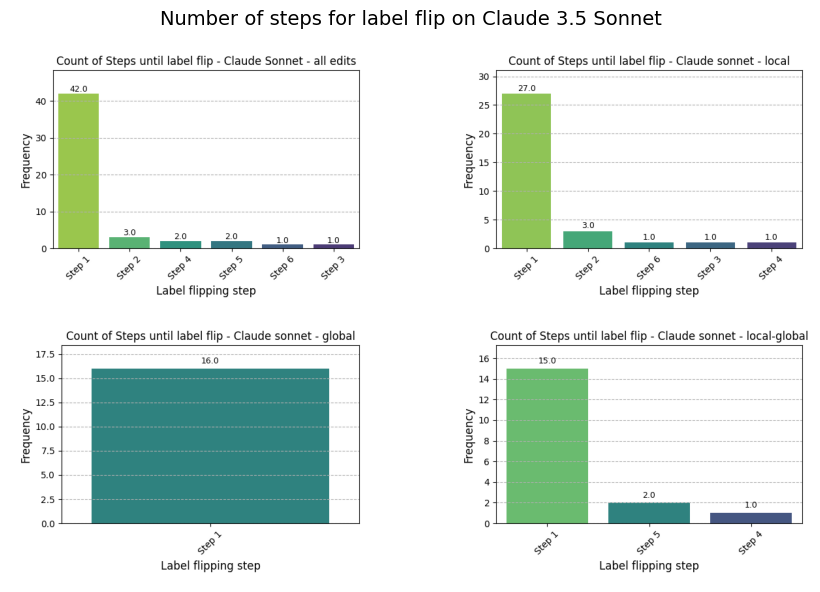

In [214]:
# Folder containing images
image_folder = "."  # Change to your actual folder path

# Get all images in the folder that contain 'densenet' and 'correctness' in the filename
filtered_images = [f for f in os.listdir(image_folder) 
                   if "sonnet" in f.lower() and "steps" in f.lower() and f.endswith(('.png', '.jpg', '.jpeg'))]

# Define expected filename patterns for sorting
filename_patterns = ["-all", "-local.", "-global.", "local_global."]

# Dictionary to store selected images
selected_images = {}

# Assign images based on filename patterns
for f in filtered_images:
    lower_f = f.lower()
    for pattern in filename_patterns:
        if pattern in lower_f:
            selected_images[pattern] = os.path.join(image_folder, f)

# Ensure we found exactly 4 required images
if len(selected_images) != 4:
    raise ValueError(f"Expected 4 images matching patterns {filename_patterns}, but found {len(selected_images)}. Check filenames.")

# Sort images in the required order
sorted_images = [selected_images[pattern] for pattern in filename_patterns]

# Create a 2x2 grid for displaying images
fig, axs = plt.subplots(2, 2, figsize=(9, 6))

# Loop through sorted images and display them in the correct order
for ax, img_path in zip(axs.flat, sorted_images):
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for Matplotlib

    ax.imshow(image)
    ax.axis('off')  # Hide axes
    
fig.suptitle("Number of steps for label flip on Claude 3.5 Sonnet", fontsize=14)

plt.subplots_adjust(hspace=0.0)  # Decrease value to bring rows closer

plt.tight_layout()
plt.savefig("flip-sonnet.png")
plt.show()

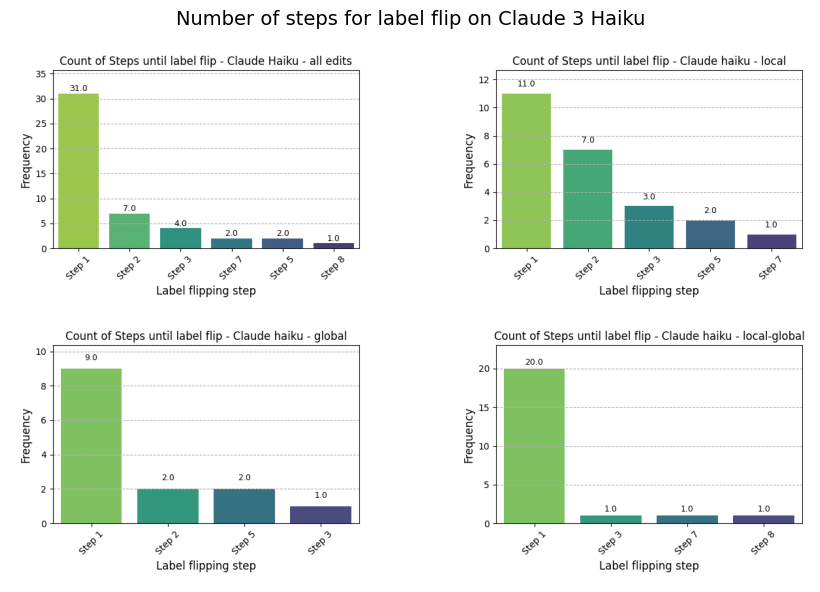

In [218]:
# Folder containing images
image_folder = "."  # Change to your actual folder path

# Get all images in the folder that contain 'densenet' and 'correctness' in the filename
filtered_images = [f for f in os.listdir(image_folder) 
                   if "haiku" in f.lower() and "steps" in f.lower() and f.endswith(('.png', '.jpg', '.jpeg'))]

# Define expected filename patterns for sorting
filename_patterns = ["-all", "-local.", "-global.", "local_global."]

# Dictionary to store selected images
selected_images = {}

# Assign images based on filename patterns
for f in filtered_images:
    lower_f = f.lower()
    for pattern in filename_patterns:
        if pattern in lower_f:
            selected_images[pattern] = os.path.join(image_folder, f)

# Ensure we found exactly 4 required images
if len(selected_images) != 4:
    raise ValueError(f"Expected 4 images matching patterns {filename_patterns}, but found {len(selected_images)}. Check filenames.")

# Sort images in the required order
sorted_images = [selected_images[pattern] for pattern in filename_patterns]

# Create a 2x2 grid for displaying images
fig, axs = plt.subplots(2, 2, figsize=(9, 6))

# Loop through sorted images and display them in the correct order
for ax, img_path in zip(axs.flat, sorted_images):
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for Matplotlib

    ax.imshow(image)
    ax.axis('off')  # Hide axes
    
fig.suptitle("Number of steps for label flip on Claude 3 Haiku", fontsize=14)

plt.subplots_adjust(hspace=0.0)  # Decrease value to bring rows closer

plt.tight_layout()
plt.savefig("flip-haiku.png")
plt.show()

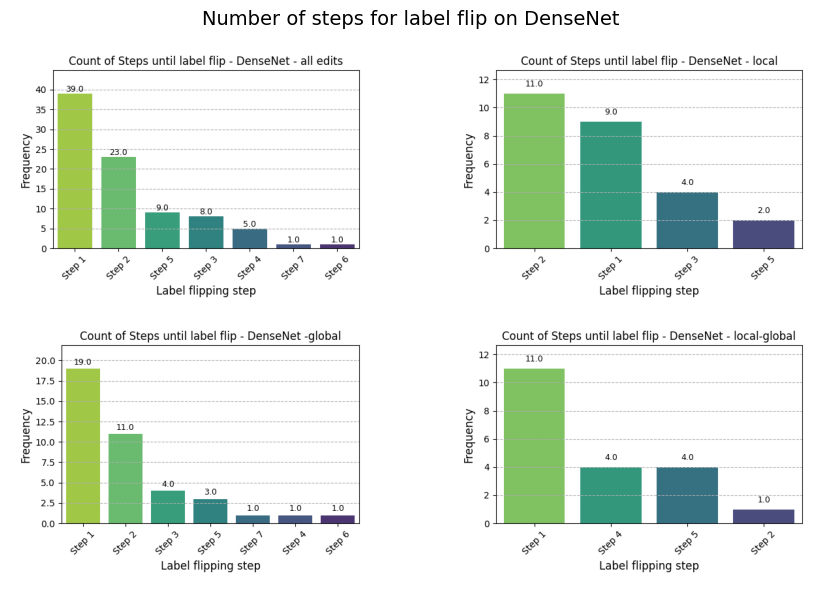

In [217]:
# Folder containing images
image_folder = "."  # Change to your actual folder path

# Get all images in the folder that contain 'densenet' and 'correctness' in the filename
filtered_images = [f for f in os.listdir(image_folder) 
                   if "densenet" in f.lower() and "steps" in f.lower() and f.endswith(('.png', '.jpg', '.jpeg'))]

# Define expected filename patterns for sorting
filename_patterns = ["-all", "-local.", "-global.", "local_global."]

# Dictionary to store selected images
selected_images = {}

# Assign images based on filename patterns
for f in filtered_images:
    lower_f = f.lower()
    for pattern in filename_patterns:
        if pattern in lower_f:
            selected_images[pattern] = os.path.join(image_folder, f)

# Ensure we found exactly 4 required images
if len(selected_images) != 4:
    raise ValueError(f"Expected 4 images matching patterns {filename_patterns}, but found {len(selected_images)}. Check filenames.")

# Sort images in the required order
sorted_images = [selected_images[pattern] for pattern in filename_patterns]

# Create a 2x2 grid for displaying images
fig, axs = plt.subplots(2, 2, figsize=(9, 6))

# Loop through sorted images and display them in the correct order
for ax, img_path in zip(axs.flat, sorted_images):
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for Matplotlib

    ax.imshow(image)
    ax.axis('off')  # Hide axes
    
fig.suptitle("Number of steps for label flip on DenseNet", fontsize=14)

plt.subplots_adjust(hspace=0.0)  # Decrease value to bring rows closer

plt.tight_layout()
plt.savefig("flip-densenet.png")
plt.show()